# Wholsesale Customers Analysis

## Problem Statement:
A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

#### Importing all necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import variation
from warnings import filterwarnings
filterwarnings("ignore")
%matplotlib inline
sns.set(color_codes=True)

#### Importing the dataset and doing basic Exploratory Data Analysis

In [2]:
ws_cust = pd.read_csv('Wholesale Customer.csv')
ws_cust.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [3]:
ws_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


From the above output we can say that
- Dataset has 440 rows and 9 columns.
- 2 columns have object datatype, whereas the remaining 7 have interger datatype.
- Dataset contains no null or missing values.

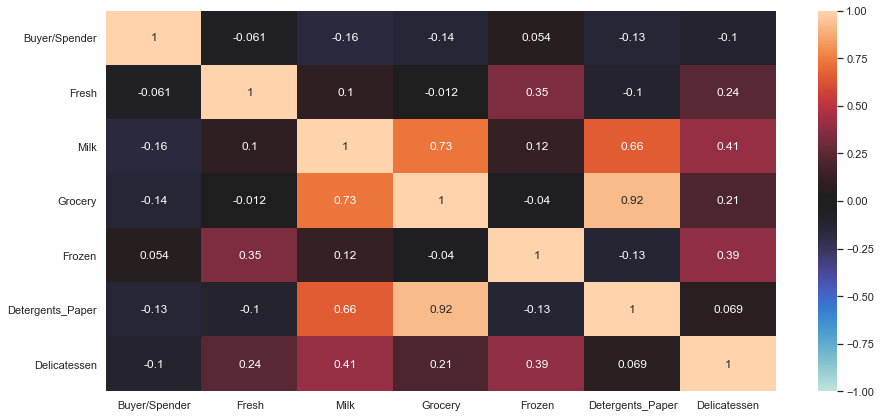

In [4]:
corr = ws_cust.corr();
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0);

From the plot above we can say that:
- Grocery & Detergents_Paper have the highest correlation strength of 0.92
- Grocery & Milk and Detergents_Paper & Milk are positively correlated to each other with good strength.

Hence, incentives like discounts, purchase offers could be provided which in turn would increase overall revenue for the wholesale distributor.

### Q1.1.1) Use methods of descriptive statistics to summarize data.

In [5]:
ws_cust.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440,NaN,NaN,NaN,220.5,127.161,1,110.75,220.5,330.25,440
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943


 ### Q1.1.2 & 1.1.3) Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [6]:
ws_cust['Total Spending'] = ws_cust['Fresh']+ws_cust['Milk']+ws_cust['Grocery']+ws_cust['Frozen']+ws_cust['Detergents_Paper']+ws_cust['Delicatessen']
ws_cust.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spending
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


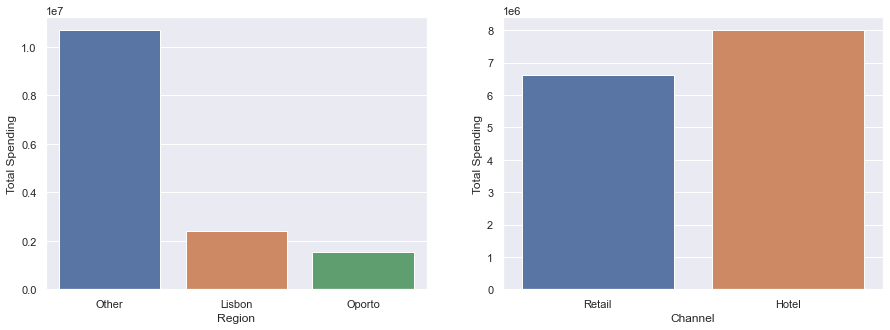

In [7]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
a = sns.barplot(x="Region", y="Total Spending",estimator=np.sum, ci=None, data=ws_cust)

plt.subplot(1,2,2)
b = sns.barplot(x="Channel", y="Total Spending",estimator=np.sum, ci=None, data=ws_cust)

From the above graph we can infer that:
- The Region that spent the most is Other.
- The Region that spent the least is Oporto.
- The Channel that spent the most is Hotel.
- The Channel that spent the least is Retail.

### Q1.2) There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

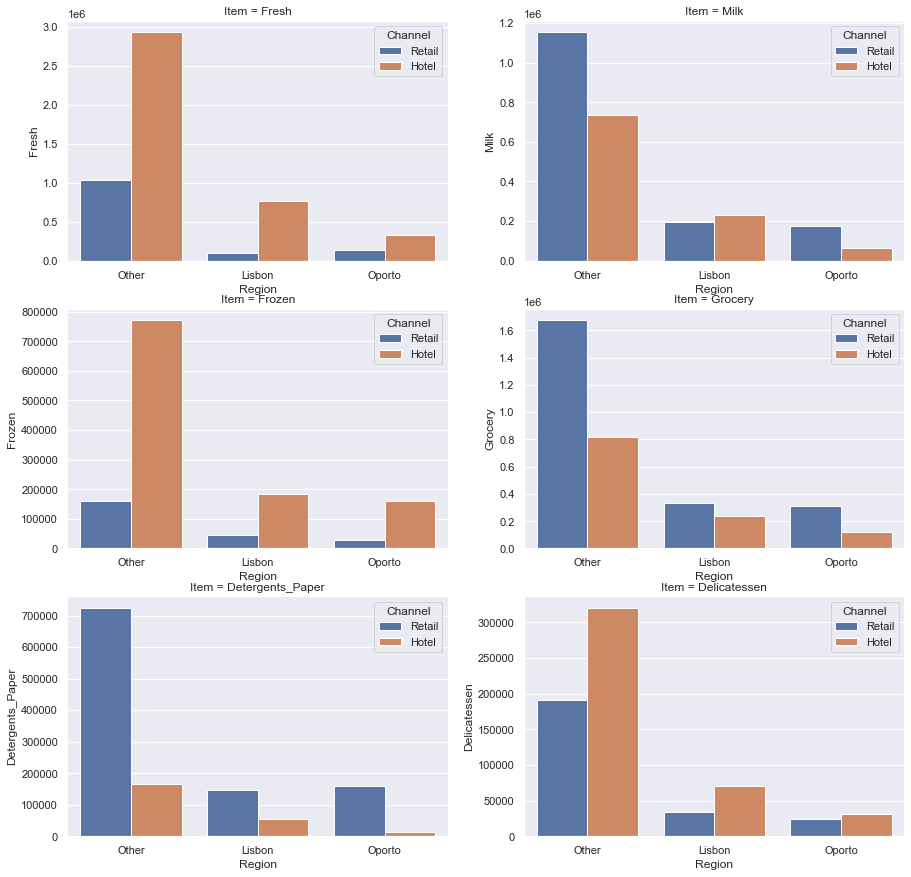

In [8]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
a = sns.barplot(x="Region", y="Fresh", hue ="Channel",estimator=np.sum, ci=None, data=ws_cust)
plt.title('Item = Fresh');

plt.subplot(3,2,2)
b = sns.barplot(x="Region", y="Milk", hue ="Channel",estimator=np.sum, ci=None, data=ws_cust)
plt.title('Item = Milk');

plt.subplot(3,2,3)
c = sns.barplot(x="Region", y="Frozen", hue ="Channel",estimator=np.sum, ci=None, data=ws_cust)
plt.title('Item = Frozen');

plt.subplot(3,2,4)
d = sns.barplot(x="Region", y="Grocery", hue ="Channel",estimator=np.sum, ci=None, data=ws_cust)
plt.title('Item = Grocery');

plt.subplot(3,2,5)
e = sns.barplot(x="Region", y="Detergents_Paper", hue ="Channel",estimator=np.sum, ci=None, data=ws_cust)
plt.title('Item = Detergents_Paper');

plt.subplot(3,2,6)
f = sns.barplot(x="Region", y="Delicatessen", hue ="Channel",estimator=np.sum, ci=None, data=ws_cust)
plt.title('Item = Delicatessen');

plt.show()

From the graph above we can infer that:
- For the item Fresh:
  - The total spending in the region 'Other' is highest for the channel 'Hotel'.
  - The total spending in the region 'Oporto' is highest for the channel 'Hotel'.
  - The total spending in the region 'Lisbon' is highest for the channel 'Hotel'.
- For the item Milk:
  - The total spending in the region 'Other' is highest for the channel 'Retail'.
  - The total spending in the region 'Oporto' is highest for the channel 'Retail'.
  - The total spending in the region 'Lisbon' is highest for the channel 'Hotel'.
- For the item Frozen:
  - The total spending in the region 'Other' is highest for the channel 'Hotel'.
  - The total spending in the region 'Oporto' is highest for the channel 'Hotel'.
  - The total spending in the region 'Lisbon' is highest for the channel 'Hotel'.
- For the item Grocery:
  - The total spending in the region 'Other' is highest for the channel 'Retail'.
  - The total spending in the region 'Oporto' is highest for the channel 'Retail'.
  - The total spending in the region 'Lisbon' is highest for the channel 'Retail'.
- For the item Detergents_Paper:
  - The total spending in the region 'Other' is highest for the channel 'Retail'.
  - The total spending in the region 'Oporto' is highest for the channel 'Retail'.
  - The total spending in the region 'Lisbon' is highest for the channel 'Retail'.
- For the item Delicatessen:
  - The total spending in the region 'Other' is highest for the channel 'Hotel'.
  - The total spending in the region 'Oporto' is highest for the channel 'Hotel'.
  - The total spending in the region 'Lisbon' is highest for the channel 'Hotel'.

### Q1.3) On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour? Which items shows the least inconsistent behaviour?

Variability describes how far apart data points lie from each other and from the center of a distribution. Along with measures of central tendency, measures of variability give you descriptive statistics that summarize your data. This is important because it tells you whether the points tend to be clustered around the center or more widely spread out. Low variability is ideal because it means that you can better predict information about the population based on sample data. High variability means that the values are less consistent, so it’s harder to make predictions.

Variability is also referred to as spread, scatter or dispersion. It is most commonly measured with the following:
- Range: the difference between the highest and lowest values
- Interquartile range: the range of the middle half of a distribution
- Standard deviation: average distance from the mean
- Variance: average of squared distances from the mean
- Coefficient of Variation:  represents the ratio of the standard deviation to the mean

In [9]:
ws_cust1 = ws_cust.copy()
products = ws_cust[ws_cust.columns[+3:ws_cust.columns.size]]
products.drop(["Total Spending"], axis=1, inplace=True)

All the other four methods except the Interquartile range (IQR) includes outliers. Hence, the results we will get using them would be affected a lot which won't be truly representing the overall dataset. Hence the answer/output obtained using IQR is the most accurate one.

#### Using Interquartile Range (IQR)

In [10]:
q75, q25 = np.percentile(products['Fresh'], [75 ,25])
iqr = q75 - q25
print("The IQR for item 'Fresh' is",iqr)

q75, q25 = np.percentile(products['Milk'], [75 ,25])
iqr = q75 - q25
print("The IQR for item 'Milk' is",iqr)

q75, q25 = np.percentile(products['Frozen'], [75 ,25])
iqr = q75 - q25
print("The IQR for item 'Frozen' is",iqr)

q75, q25 = np.percentile(products['Grocery'], [75 ,25])
iqr = q75 - q25
print("The IQR for item 'Grocery' is",iqr)

q75, q25 = np.percentile(products['Detergents_Paper'], [75 ,25])
iqr = q75 - q25
print("The IQR for item 'Detergents_Paper' is",iqr)

q75, q25 = np.percentile(products['Delicatessen'], [75 ,25])
iqr = q75 - q25
print("The IQR for item 'Delicatessen' is",iqr)

The IQR for item 'Fresh' is 13806.0
The IQR for item 'Milk' is 5657.25
The IQR for item 'Frozen' is 2812.0
The IQR for item 'Grocery' is 8502.75
The IQR for item 'Detergents_Paper' is 3665.25
The IQR for item 'Delicatessen' is 1412.0


From the above output we can say that:
- Item 'Fresh' has the highest IQR, hence, it shows the most inconsistent behaviour.
- Item 'Delicatessen' has the lowest IQR, hence, it shows the least inconsistent behaviour.

### Q1.4) Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

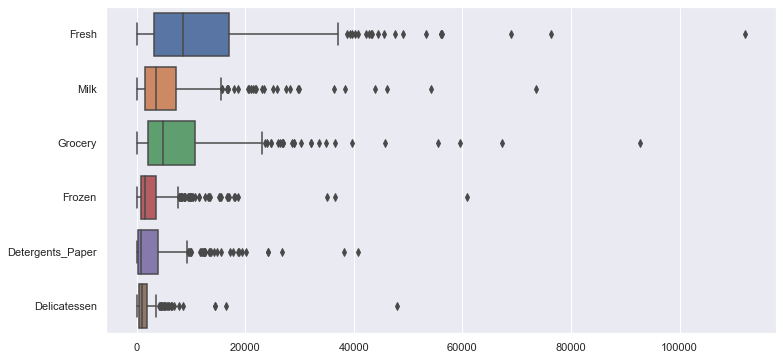

In [11]:
plt.figure(figsize=(12,6));
sns.boxplot(data=products, orient="h");

From the graph above, it is clearly evident that all the 6 items contains outliers within them. We should ivestigate them further so that decisions can be made by considering all possibilities and taking all affecting factors into account.

### Q1.5) On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective.

As per the analysis done, we can say that:
- From the correlation plot, we saw that Grocery & Detergents_Paper is positively correlated to each other with highest strength of 0.92. We can use this correlation to improve sales of either of the two across channels/regions. We can provide incentives or discounts in Oporto region for hotel channel on Detergents_Paper when bought along with grocery to bump its spend in the region.
- Milk is strongly correlated with grocery and Detergents_Paper. For Lisbon region, milk has lower spend in retail channel compared to the hotel though. Both grocery and detergents have higher spend in retail for the same region. We can leverage these two items and provide incentives or discounts on milk alongside these two correlated items to gain bigger share in retail channel.
- Also, in order to increase sales of item Delicatessen, it could be provided for free on certain amount of purchase of grocery so that it could further be bought and tried by more & more customers down the purchasing line thereby increasing its popularity and future purchases.
- Higher the number of outliers, greater is the inconsistency. We should investigate why there are so many outliers and then figure out how can we reduce those. Looking at the correlation is also important while gauging the impact to other items. So, any decisions to improve consistency should not directly impact spend on other items. 
- The spending of Hotel and Retail channel are different in almost every region, which should be more or less equal for better outcomes.

# CMSU Student Survey Analysis

## Problem Statement:
The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

#### Importing all necessary Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import variation
from warnings import filterwarnings
filterwarnings("ignore")
%matplotlib inline
sns.set(color_codes=True)

#### Importing the dataset and doing basic Exploratory Data Analysis

In [13]:
cmsu_survey = pd.read_csv('Survey-1.csv')
cmsu_survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [14]:
cmsu_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


### Q2.1) For this data, construct the following contingency tables (Keep Gender as row variable)
### Q2.1.1) Gender and Major

In [15]:
contin_1 = pd.crosstab(cmsu_survey['Gender'], cmsu_survey['Major'], margins = True, margins_name="Total")
contin_1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


### Q2.1.2) Gender and Grad Intention

In [16]:
contin_2 = pd.crosstab(cmsu_survey['Gender'], cmsu_survey['Grad Intention'], margins = True, margins_name="Total")
contin_2

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


### Q2.1.3) Gender and Employment

In [17]:
contin_3 = pd.crosstab(cmsu_survey['Gender'], cmsu_survey['Employment'], margins = True, margins_name="Total")
contin_3

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


### Q2.1.4) Gender and Computer

In [18]:
contin_4 = pd.crosstab(cmsu_survey['Gender'], cmsu_survey['Computer'], margins = True, margins_name="Total")
contin_4

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


### Q2.2) Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:
### Q2.2.1) What is the probability that a randomly selected CMSU student will be Male?

In [19]:
cmsu_survey['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [20]:
print("The probability of a randomly selected CMSU student being a male is",
      round(29/len(cmsu_survey['Gender'])*100,2),"%")

The probability of a randomly selected CMSU student being a male is 46.77 %


### Q2.2.2) What is the probability that a randomly selected CMSU student will be Female?

In [21]:
print("The probability of a randomly selected CMSU student being a female is",
      round(33/len(cmsu_survey['Gender'])*100,2),"%")

The probability of a randomly selected CMSU student being a female is 53.23 %


### Q2.3) Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question
### Q2.3.1) Find the conditional probability of different majors among the Male students in CMSU.

In [22]:
contin_1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [23]:
print("The probability of males opting for the Major field 'Accounting' is",round((4/29)*100,2),"%")
print("The probability of males opting for the Major field 'CIS' is",round((1/29)*100,2),"%")
print("The probability of males opting for the Major field 'Economics/Finance' is",round((4/29)*100,2),"%")
print("The probability of males opting for the Major field 'International Business' is",round((2/29)*100,2),"%")
print("The probability of males opting for the Major field 'Management' is",round((6/29)*100,2),"%")
print("The probability of males opting for the Major field 'Other' is",round((4/29)*100,2),"%")
print("The probability of males opting for the Major field 'Retailing/Marketing' is",round((5/29)*100,2),"%")
print("The probability of males who are 'Undecided' for a Major field is",round((3/29)*100,2),"%")

The probability of males opting for the Major field 'Accounting' is 13.79 %
The probability of males opting for the Major field 'CIS' is 3.45 %
The probability of males opting for the Major field 'Economics/Finance' is 13.79 %
The probability of males opting for the Major field 'International Business' is 6.9 %
The probability of males opting for the Major field 'Management' is 20.69 %
The probability of males opting for the Major field 'Other' is 13.79 %
The probability of males opting for the Major field 'Retailing/Marketing' is 17.24 %
The probability of males who are 'Undecided' for a Major field is 10.34 %


### Q2.3.2) Find the conditional probability of different majors among the Female students in CMSU.

In [24]:
print("The probability of females opting for the Major field 'Accounting' is",round((3/33)*100,2),"%")
print("The probability of females opting for the Major field 'CIS' is",round((3/33)*100,2),"%")
print("The probability of females opting for the Major field 'Economics/Finance' is",round((7/33)*100,2),"%")
print("The probability of females opting for the Major field 'International Business' is",round((4/33)*100,2),"%")
print("The probability of females opting for the Major field 'Management' is",round((4/33)*100,2),"%")
print("The probability of females opting for the Major field 'Other' is",round((3/33)*100,2),"%")
print("The probability of females opting for the Major field 'Retailing/Marketing' is",round((9/33)*100,2),"%")
print("The probability of females who are 'Undecided' for a Major field is",round((0/33)*100,2),"%")

The probability of females opting for the Major field 'Accounting' is 9.09 %
The probability of females opting for the Major field 'CIS' is 9.09 %
The probability of females opting for the Major field 'Economics/Finance' is 21.21 %
The probability of females opting for the Major field 'International Business' is 12.12 %
The probability of females opting for the Major field 'Management' is 12.12 %
The probability of females opting for the Major field 'Other' is 9.09 %
The probability of females opting for the Major field 'Retailing/Marketing' is 27.27 %
The probability of females who are 'Undecided' for a Major field is 0.0 %


### Q2.4) Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:
### Q2.4.1) Find the probability that a randomly chosen student is a male and intends to graduate.

In [25]:
contin_2

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


In [26]:
num_stud_male_grad = 17
total_stud = 62
print("The probability of a randomly chosen student being a male and intends to graduate is",
      round((num_stud_male_grad/total_stud)*100,2),"%")

The probability of a randomly chosen student being a male and intends to graduate is 27.42 %


### Q2.4.2) Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [27]:
contin_4

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


In [28]:
num_stud_female_nlaptop = 4
total_stud = 62
print("The probability of a randomly selected student being a female and does NOT have a laptop is",
      round((num_stud_female_nlaptop/total_stud)*100,2),"%")

The probability of a randomly selected student being a female and does NOT have a laptop is 6.45 %


### Q2.5) Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:
### 2.5.1) Find the probability that a randomly chosen student is a male or has a full-time employment

In [29]:
contin_3

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


In [30]:
num_stud_male_ft_emp = 29+10-7
total_stud = 62
print("The probability of a randomly chosen student being a male or has a full-time employment is",
      round(((num_stud_male_ft_emp)/total_stud)*100,2),"%")

The probability of a randomly chosen student being a male or has a full-time employment is 51.61 %


### Q2.5.2) Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management

In [31]:
contin_1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [32]:
num_fem_ib_man = 4+4
total_female = 33
print("Given a female student is randomly chosen, the probability of she majoring in international business or management is"
      ,round((num_fem_ib_man/total_female)*100,2),"%")

Given a female student is randomly chosen, the probability of she majoring in international business or management is 24.24 %


### Q2.6) Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?

In [33]:
contin_5 = pd.crosstab(cmsu_survey['Gender'], cmsu_survey['Grad Intention'])
contin_5.drop(["Undecided"], axis=1, inplace=True)
contin_5['Total'] = contin_5['No']+contin_5['Yes']
total = contin_5.sum()
total.name = 'Total'
contin_5 = contin_5.append(total.transpose())
contin_5

Grad Intention,No,Yes,Total
Gender,,,
Female,9,11,20
Male,3,17,20
Total,12,28,40


In [34]:
print("The probability of a randomly chosen student being a female is",20/40*100,"%")
print("The probability of a randomly chosen student having intention to graduate is",28/40*100,"%")
print("The probability of a randomly chosen student being a female and intends to graduate is",round(11/40*100,2),"%")
print("The product of P(Being Female) & P(Intent to graduate) is",round(((50*70)/100),2),"%")

The probability of a randomly chosen student being a female is 50.0 %
The probability of a randomly chosen student having intention to graduate is 70.0 %
The probability of a randomly chosen student being a female and intends to graduate is 27.5 %
The product of P(Being Female) & P(Intent to graduate) is 35.0 %


Since, P(Being Female ∩ Intent to graduate) ≠ P(Being Female) * P(Intent to graduate), we can say that the two events Graduate Intention & Being Female are not independent Events

### Q2.7) Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data
### Q2.7.1) If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [35]:
contin_6 = pd.crosstab(cmsu_survey['Gender'], cmsu_survey['GPA'], margins = True, margins_name="Total")
contin_6

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,Total
Gender,,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1,33
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0,29
Total,1,1,6,2,3,4,7,7,6,5,7,6,3,2,1,1,62


In [36]:
num_stud_less_3_gpa = 1+1+6+2+3+4
total_stud = 62
print("The probability of a randomly chosen student having GPA less than 3 is",round((num_stud_less_3_gpa/total_stud)*100,2),"%")

The probability of a randomly chosen student having GPA less than 3 is 27.42 %


### Q2.7.2) Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [37]:
contin_7 = pd.crosstab(cmsu_survey['Gender'], cmsu_survey['Salary'], margins = True, margins_name="Total")
contin_7

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0,Total
Gender,,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1,33
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1,29
Total,1,5,2,1,1,12,1,5,1,1,9,1,1,8,8,1,1,1,2,62


In [38]:
num_female_more_50 = 5+0+0+5+5+0+1+1+1
num_male_more_50 = 4+1+1+3+3+1+0+0+1
total_male = 29
total_female = 33
print(" The probability of a randomly selected male earning 50 or more is",round((num_male_more_50/total_male)*100,2),"%")
print(" The probability of a randomly selected female earning 50 or more is",round((num_female_more_50/total_female)*100,2),"%")

 The probability of a randomly selected male earning 50 or more is 48.28 %
 The probability of a randomly selected female earning 50 or more is 54.55 %


### Q2.8.1) Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

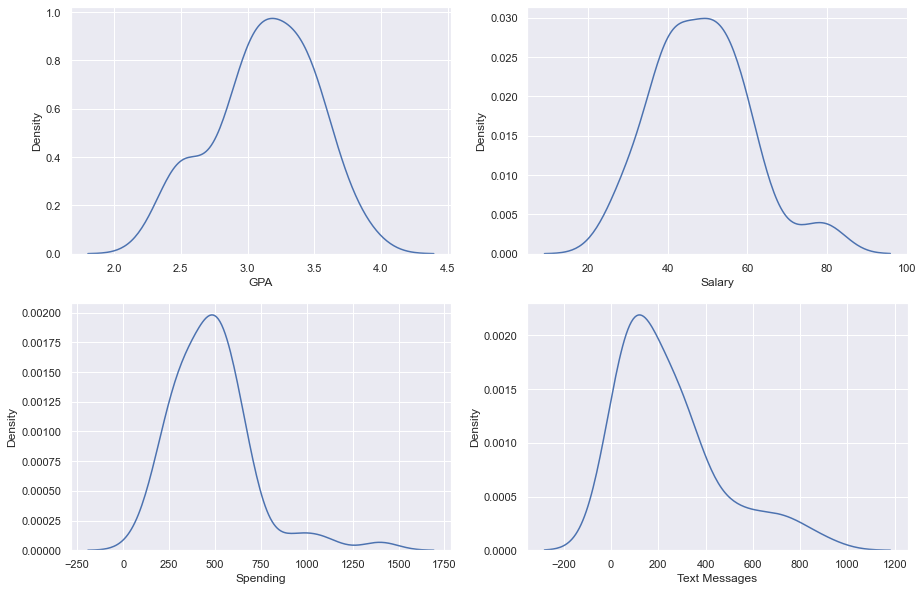

In [39]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
a = sns.distplot(cmsu_survey['GPA'],hist=False);

plt.subplot(2,2,2)
a = sns.distplot(cmsu_survey['Salary'],hist=False);

plt.subplot(2,2,3)
a = sns.distplot(cmsu_survey['Spending'],hist=False);

plt.subplot(2,2,4)
a = sns.distplot(cmsu_survey['Text Messages'],hist=False);

In [40]:
shapiro_test_GPA = stats.shapiro(cmsu_survey['GPA'])
shapiro_test_Salary = stats.shapiro(cmsu_survey['Salary'])
shapiro_test_Spending = stats.shapiro(cmsu_survey['Spending'])
shapiro_test_Texts = stats.shapiro(cmsu_survey['Text Messages'])
print("For GPA:",shapiro_test_GPA)
print("For Salary:",shapiro_test_Salary)
print("For Spending:",shapiro_test_Spending)
print("For Text Messages:",shapiro_test_Texts)

For GPA: ShapiroResult(statistic=0.9685361981391907, pvalue=0.11204058676958084)
For Salary: ShapiroResult(statistic=0.9565856456756592, pvalue=0.028000956401228905)
For Spending: ShapiroResult(statistic=0.8777452111244202, pvalue=1.6854661225806922e-05)
For Text Messages: ShapiroResult(statistic=0.8594191074371338, pvalue=4.324040673964191e-06)


From above we can say that:
- Only GPA shows normal distribution as it has p-value > 0.05.
- Salary, Spending and Text Messages do not show normal distribution as they have p-value < 0.05.

### Q2.8.2) Write a note summarizing your conclusions

From all the above information we analyzed we can say that:
- Since GPA shows normal distribution, 
  - It is symmetric.
  - The mean, median, and mode are all equal.
  - Half of the population is less than the mean and half is greater than the mean.
  - The Empirical Rule allows you to determine the proportion of values that fall within certain distances from the mean.
- Since Salary, Spending & Text messages do not show normal distribution,
  - They are skewed.
  - The mean, median, mode are all different.
  - Population distribution is uneven about the mean
  - They do not follow empirical rule hence we cannot determine the proportion of values that fall within certain distances from the mean.

# Shingle Type Analysis

## Problem Statement
An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

#### Importing all necessary Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import variation, ttest_1samp, ttest_ind
from warnings import filterwarnings
filterwarnings("ignore")
%matplotlib inline
sns.set(color_codes=True)

#### Importing the dataset and doing basic Exploratory Data Analysis

In [42]:
df = pd.read_csv('A+&+B+shingles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


### Q3.1) Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

#### For Shingle A

#### Step 1: Define null and alternative hypotheses

* $H_0$: $\mu_A$ $\geq$ 0.35
* $H_A$: $\mu_A$ < 0.35

#### Step 2: Decide the significance level

Here we select  𝛼  = 0.05.

#### Step 3: Identify the test statistic

We do not know the population standard deviation and n = 36. So we use the t distribution and the $t_{STAT}$ test statistic.

#### Step 4: Calculate the p - value and test statistic

In [43]:
t_statistic, p_value = ttest_1samp(df.A, 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.14955266289815025 


#### Step 5: Decide to reject or accept null hypothesis

In [44]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value)

Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value > Level of significance
Our one-sample t-test p-value= 0.14955266289815025


From the above output we can say that:
- Since p-value > 0.05, there is not enough evidence to conclude that the mean moisture content for Shingles type A is less than 0.35 pounds per 100 square feet.

#### For Shingle B

#### Step 1: Define null and alternative hypotheses

For the A shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet is given:
* $H_0$: $\mu_B$ $\geq$ 0.35
* $H_A$: $\mu_B$ < 0.35

#### Step 2: Decide the significance level

Here we select  𝛼  = 0.05.

#### Step 3: Identify the test statistic

We do not know the population standard deviation and n = 31. So we use the t distribution and the $t_{STAT}$ test statistic.

#### Step 4: Calculate the p - value and test statistic

In [45]:
t_statistic, p_value = ttest_1samp(df.B, 0.35,nan_policy='omit')
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: -3.1003313069986995 p value: 0.004180954800638365 


#### Step 5 Decide to reject or accept null hypothesis

In [46]:
alpha_value = 0.05
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value)

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value < Level of significance
Our one-sample t-test p-value= 0.004180954800638365


From the above output we can say that:
- Since p-value < 0.05, there is enough evidence to conclude that the mean moisture content for Shingles of type B is less than 0.35 pounds per 100 square feet.

### Q3.2) Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

#### Step 1: Define null and alternative hypotheses

* $H_0$: $\mu_A$ = $\mu_B$
* $H_A$: $\mu_A$ $\neq$ $\mu_B$

#### Step 2: Decide the significance level

Here we select  𝛼  = 0.05 and the population standard deviation is not known.

#### Step 3: Identify the test statistic

* We have two samples and we do not know the population standard deviation.
* Sample sizes for both samples are  same.
* The sample is not a large sample, n1 & n2 < 40. So you use the t distribution and the $t_{STAT}$ test statistic for two sample unpaired test.

#### Step 4: Calculate the p - value and test statistic

The assumption that we need to check before the test for equality of means is performed is that:
* The variance is equal and then compute the necessary statistical values.

In [47]:
t_statistic, p_value  = ttest_ind(df['A'],df['B'], nan_policy='omit')
print('tstat',t_statistic)    
print('P Value',p_value)

tstat 1.2896282719661123
P Value 0.2017496571835306


#### Step 5:  Decide to reject or accept null hypothesis

In [48]:
print ("two-sample t-test p-value=", p_value)

alpha_level = 0.05

if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the mean moisture content of both the shingle types is not same.')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the mean moisture content of both the shingle types is same.')

two-sample t-test p-value= 0.2017496571835306
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the mean moisture content of both the shingle types is same.


From the above output we can say that:

Since p-value > 0.05, there is enough evidence to conclude that: 

The mean moisture content for Shingles of type A = mean moisture content for Shingles of type B.

## THE END